In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

import numpy as np
import time

In [2]:
digits = load_digits()

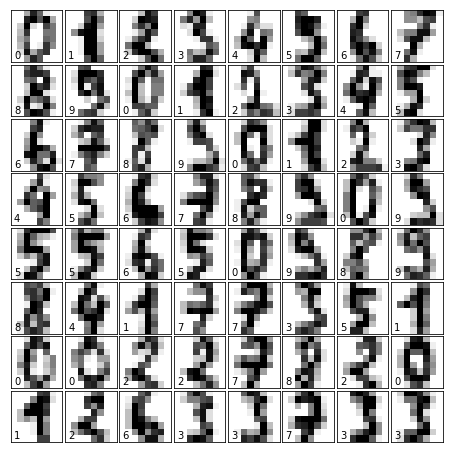

In [3]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

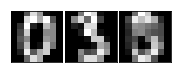

In [4]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(8, 8, 1, xticks=[], yticks=[])
ax.imshow(-digits.images[0], cmap=plt.cm.binary, interpolation='nearest')

ax = fig.add_subplot(8, 8, 2, xticks=[], yticks=[])
ax.imshow(-digits.images[3], cmap=plt.cm.binary, interpolation='nearest')

ax = fig.add_subplot(8, 8, 3, xticks=[], yticks=[])
ax.imshow(-0.5*digits.images[0]-0.5*digits.images[3], cmap=plt.cm.binary, interpolation='nearest')

In [5]:
def print_confusion_matrix(conf_mat):
        print("TP = {0}\nFP = {1}\nFN = {2}\nTN = {3}".format(conf_mat[0][0], conf_mat[1][0], conf_mat[0][1], conf_mat[1][1]))

In [6]:
def classify(proj):
    X_train, X_test, y_train, y_test = train_test_split(proj, digits.target, test_size = 0.3, random_state = 42)

    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(X_train, y_train)

    t = time.time()
    y_test_predict = knn.predict(X_test)
    time_all = (time.time() - t)/len(X_test)

    acc_train = 1 - np.mean(y_train != knn.predict(X_train))
    acc_test  = 1 - np.mean(y_test  != y_test_predict)

    print("Train: ", acc_train)
    print("Test: ", acc_test)
    print("Time", time_all)

    print()

    print_confusion_matrix(confusion_matrix(y_test, y_test_predict))

## PCA

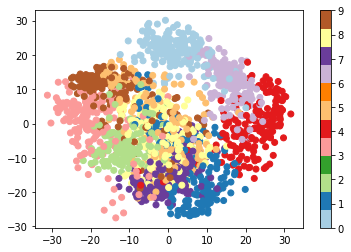

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [8]:
classify(proj)

Train:  0.6992840095465394
Test:  0.6537037037037037
Time 9.599879935935691e-06

TP = 47
FP = 0
FN = 0
TN = 25


## Isomap

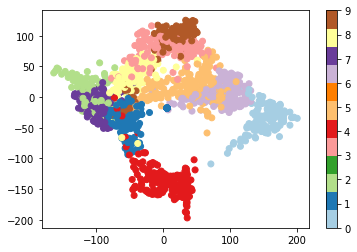

In [9]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
proj = isomap.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [10]:
classify(proj)

Train:  0.837708830548926
Test:  0.812962962962963
Time 7.76317384507921e-06

TP = 53
FP = 0
FN = 0
TN = 46


## Multidimensional scaling

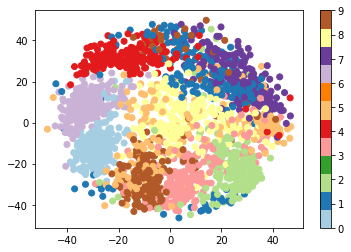

In [11]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
proj = mds.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [12]:
classify(proj)

Train:  0.771678599840891
Test:  0.7333333333333334
Time 8.062963132505063e-06

TP = 50
FP = 0
FN = 0
TN = 28


## Stochastic neighbor embedding 

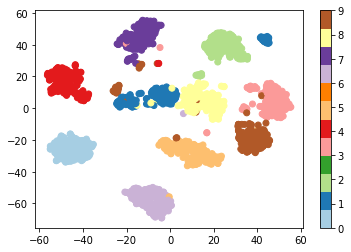

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [14]:
classify(proj)

Train:  0.9864757358790772
Test:  0.9888888888888889
Time 7.202007152416088e-06

TP = 53
FP = 0
FN = 0
TN = 50


## Spectral embedding

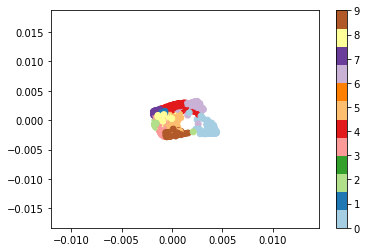

In [15]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=2)
proj = se.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [16]:
classify(proj)

Train:  0.807478122513922
Test:  0.7907407407407407
Time 5.270375145806206e-06

TP = 53
FP = 0
FN = 0
TN = 32


## Classifiaction results (k-NN)

| Method                        | Accuracy | Time    |
|-------------------------------|:--------:|:-------:|
| PCA                           | 65.37    | 9.60-06 |
| Isomap                        | 81.30    | 7.76-06 |
| MDS                           | 73.33    | 8.06-06 |
| Stochastic neighbor embedding | 98.89    | 7.20-06 |
| Spectral embedding            | 79.07    | 5.27-06 |

## Classifiaction results, Google Colab (k-NN)

| Method                        | Accuracy | Time    |
|-------------------------------|:--------:|:-------:|
| PCA                           | 65.37    | 6.31-05 |
| Isomap                        | 81.30    | 3.66-05 |
| MDS                           | 73.89    | 3.90-05 |
| Stochastic neighbor embedding | 98.89    | 3.64-05 |
| Spectral embedding            | 79.07    | 4.43-05 |